# Nose to Time Series 

## Time Series

## Time Series Analysis

## Objectives

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
import pandas as pd
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%y')
data = pd.read_csv('StockPrice.csv', header = 0)
data.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,ABBV,1/2/2015,65.62,66.40,65.49,65.89,5087291,0.0,1,59.865188,60.576782,59.746589,60.111509,5087291
1,ABBV,1/5/2015,65.50,66.10,63.88,64.65,8007433,0.0,1,59.755712,60.303092,58.277784,58.980256,8007433
2,ABBV,1/6/2015,65.62,65.75,63.70,64.33,5488071,0.0,1,59.865188,59.983787,58.113570,58.688320,5488071
3,ABBV,1/7/2015,64.57,67.05,64.48,66.93,8283083,0.0,1,58.907272,61.169778,58.825165,61.060302,8283083
4,ABBV,1/8/2015,68.16,68.29,67.42,67.63,7945920,0.0,1,62.182432,62.301031,61.507329,61.698913,7945920


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ticker       504 non-null    object 
 1   date         504 non-null    object 
 2   open         504 non-null    float64
 3   high         504 non-null    float64
 4   low          504 non-null    float64
 5   close        504 non-null    float64
 6   volume       504 non-null    int64  
 7   ex-dividend  504 non-null    float64
 8   split_ratio  504 non-null    int64  
 9   adj_open     504 non-null    float64
 10  adj_high     504 non-null    float64
 11  adj_low      504 non-null    float64
 12  adj_close    504 non-null    float64
 13  adj_volume   504 non-null    int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 55.2+ KB


In [4]:
# Take a look at the indices
data.index

RangeIndex(start=0, stop=504, step=1)

In [5]:
reducedData = data.iloc[:,[2,5]]

In [6]:
reducedData['AveragePrice'] = (reducedData['open'] + reducedData['close'])/2

D:\programlar\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
reducedData.head()

,open,close,AveragePrice
0,65.62,65.89,65.755
1,65.50,64.65,65.075
2,65.62,64.33,64.975
3,64.57,66.93,65.750
4,68.16,67.63,67.895


In [8]:
myPrice = reducedData.loc[:,'AveragePrice']
myPrice.head()

0    65.755
1    65.075
2    64.975
3    65.750
4    67.895
Name: AveragePrice, dtype: float64

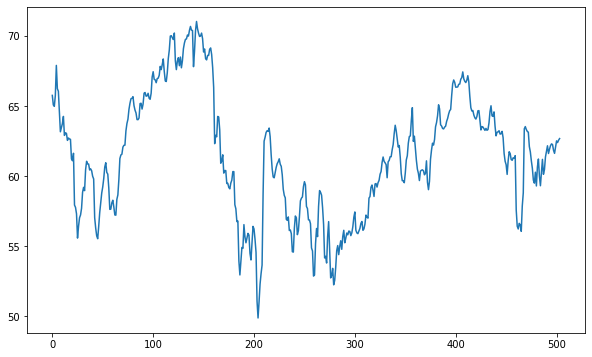

In [9]:
plt.plot(myPrice)

## Components of a Time series

D:\programlar\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


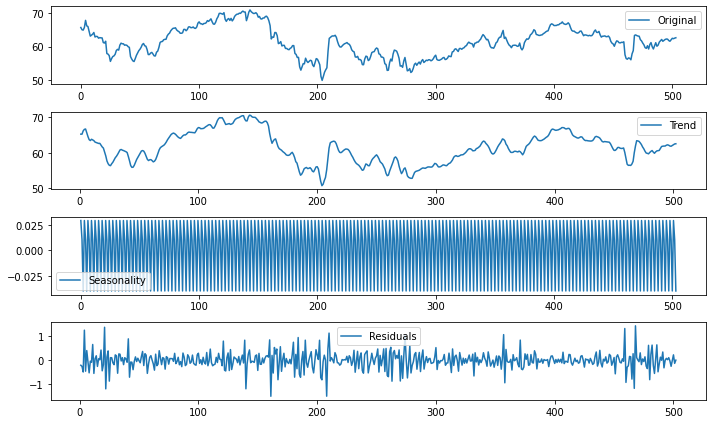

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(myPrice, freq = 3)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(myPrice, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Normality test

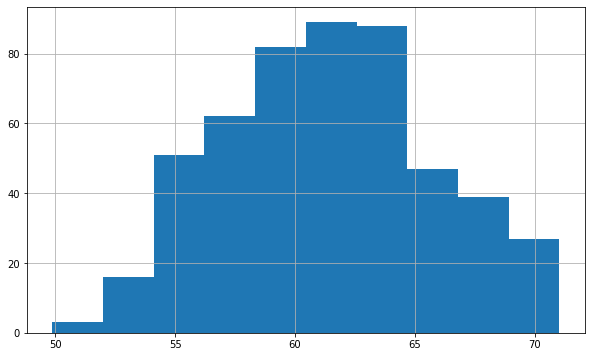

In [11]:
from pandas import Series
from matplotlib import pyplot
myPrice.hist()
pyplot.show()

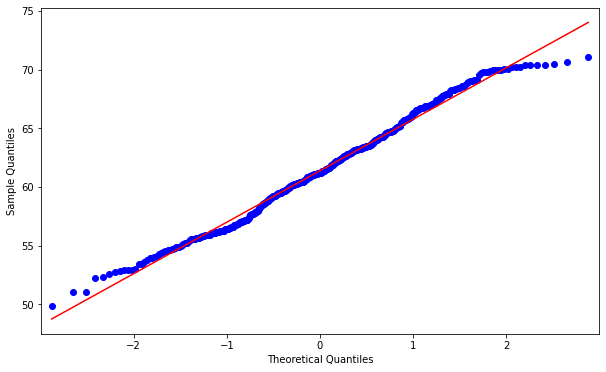

In [12]:
# q-q plot
from statsmodels.graphics.gofplots import qqplot
qqplot(myPrice, line='s')
pyplot.show()

## Shapiro Test

In [13]:
from scipy.stats import shapiro

In [14]:
def shapiroTest(ts):
    val = shapiro(ts)
    statistic = round(val[0],3)
    pval = round(val[1],3)
    criticalVal = 0.05
    if pval > criticalVal:
        print('a Gaussian case')
    else:
        print('a non Gaussian case')

In [15]:
shapiroTest(myPrice)

a non Gaussian case


## Stationarity

In [16]:
# Let us investigate if the mean and the varianne of the series change through time
def rolling_Mean_STD(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    
    rolstd = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)


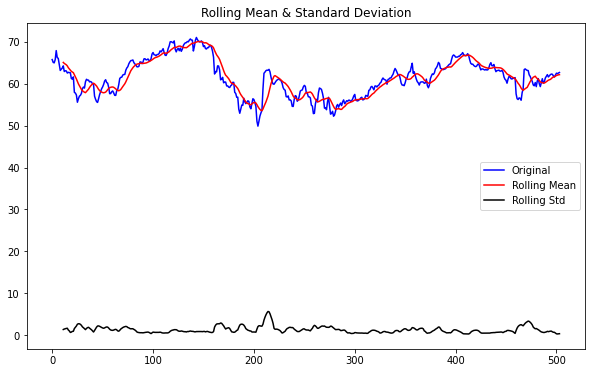

In [17]:
rolling_Mean_STD(myPrice)

In [18]:
ts = myPrice

In [19]:
ts.loc[:'AveragePrice']

0      65.7550
1      65.0750
2      64.9750
3      65.7500
4      67.8950
        ...   
499    62.0600
500    62.5100
501    62.3900
502    62.5600
503    62.6745
Name: AveragePrice, Length: 504, dtype: float64

In [20]:
def mean_checker(timeSeries):
    thres = int(len(timeSeries)/3)
    firstPart = timeSeries[1:thres]
    secondPart = timeSeries[(thres+1):(2*thres)]
    thirdPart = timeSeries[(2*thres+1):]
    
    print('the length of the first part is',len(firstPart))
    print('the length of the second part is',len(secondPart))
    print('the length of the third part is',len(thirdPart))
    
    print('-------------------------------------------------')
    firstMean = firstPart.mean()
    secondMean = secondPart.mean()
    thirdMean = thirdPart.mean()
    
    print('--------------------------------------------------')
    print('The mean of the first part is',firstMean)
    print('The mean of the second part is',secondMean)
    print('The mean of the third part is',thirdMean)

In [21]:
mean_checker(ts)

the length of the first part is 167
the length of the second part is 167
the length of the third part is 167
-------------------------------------------------
--------------------------------------------------
The mean of the first part is 64.27929640718563
The mean of the second part is 57.31086826347307
The mean of the third part is 62.53321556886225


In [22]:
# What other way can you use to see if the series is stationary or not?
# write a function called std_checker

In [23]:
# let us use the Duckey Fuller Test
from statsmodels.tsa.stattools import adfuller
def stationarity_test(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value',
                                             '#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [24]:
stationarity_test(myPrice)

Results of Dickey-Fuller Test:
Test Statistic                  -2.021557
p-value                          0.277202
#Lags Used                       8.000000
Number of Observations Used    495.000000
Critical Value (1%)             -3.443630
Critical Value (5%)             -2.867397
Critical Value (10%)            -2.569889
dtype: float64


## Make The Series Stationary

In [25]:
# Let's us try to make the series stationary. For, we need to applay some transformation

### Log Transformation

In [26]:
logTs = np.log(ts)

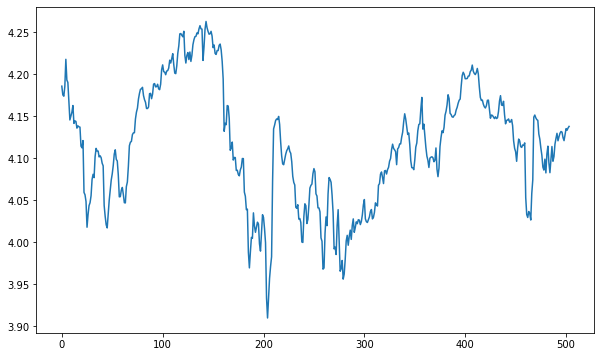

In [27]:
plt.plot(logTs)

In [28]:
# apply the rolling_Mean_STD to the log

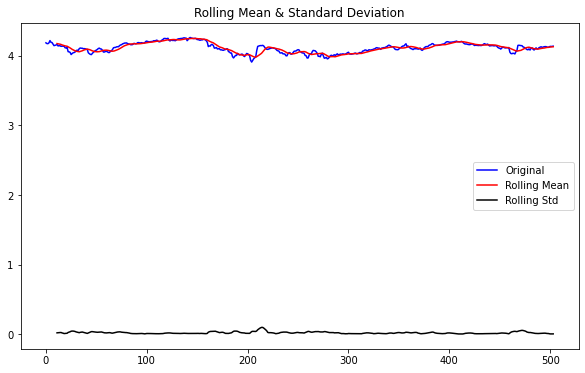

In [29]:
rolling_Mean_STD(logTs)

In [30]:
# apply the function mean_checker

In [31]:
mean_checker(logTs)

the length of the first part is 167
the length of the second part is 167
the length of the third part is 167
-------------------------------------------------
--------------------------------------------------
The mean of the first part is 4.160980262007945
The mean of the second part is 4.047325940281942
The mean of the third part is 4.134980982211963


In [32]:
# apply the Duckey Fuller test

In [53]:
stationarity_test(logTs)

Results of Dickey-Fuller Test:
Test Statistic                  -2.081250
p-value                          0.252121
#Lags Used                       8.000000
Number of Observations Used    495.000000
Critical Value (1%)             -3.443630
Critical Value (5%)             -2.867397
Critical Value (10%)            -2.569889
dtype: float64


### Differencing

In [33]:
# similar thing could be done by differencing the series

In [34]:
#Take first difference:
differencedSeries = ts - ts.shift()
differencedSeries

0         NaN
1     -0.6800
2     -0.1000
3      0.7750
4      2.1450
        ...  
499    0.4400
500    0.4500
501   -0.1200
502    0.1700
503    0.1145
Name: AveragePrice, Length: 504, dtype: float64

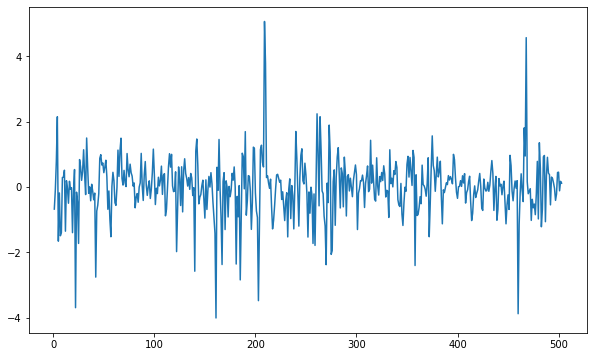

In [35]:
differencedSeries.dropna(inplace = True)
plt.plot(differencedSeries)

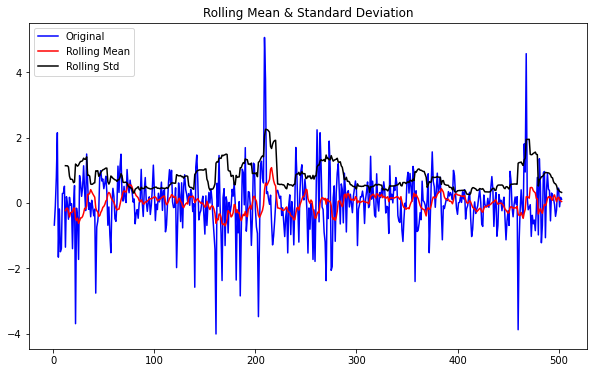

In [36]:
# Let us apply our rolling_Mean_STD(logTs)
rolling_Mean_STD(differencedSeries)

In [37]:
mean_checker(differencedSeries)

the length of the first part is 166
the length of the second part is 166
the length of the third part is 168
-------------------------------------------------
--------------------------------------------------
The mean of the first part is -0.025060240963855444
The mean of the second part is 0.00021084337349395535
The mean of the third part is 0.007705357142857096


In [38]:
# Duckey fuller test

In [54]:
stationarity_test(differencedSeries)

Results of Dickey-Fuller Test:
Test Statistic                -1.051146e+01
p-value                        1.021929e-18
#Lags Used                     7.000000e+00
Number of Observations Used    4.950000e+02
Critical Value (1%)           -3.443630e+00
Critical Value (5%)           -2.867397e+00
Critical Value (10%)          -2.569889e+00
dtype: float64


## Time Series forecasting

### ARIMA, benchmark model in time Series

### Introduction to autocorrelation function(ACF)

In [39]:
from statsmodels.tsa.stattools import acf, pacf  

D:\programlar\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Autocorrelation Function')

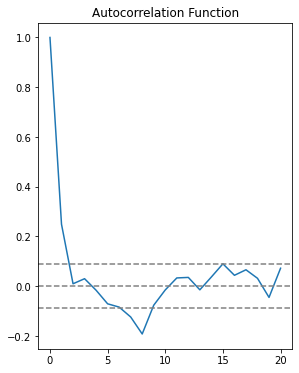

In [40]:
acValues = acf(differencedSeries, nlags=20)
#Plot ACF:    
plt.subplot(121)    
plt.plot(acValues)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(differencedSeries)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(differencedSeries)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


### Introduction to Partial autocrrelation function(PACF)

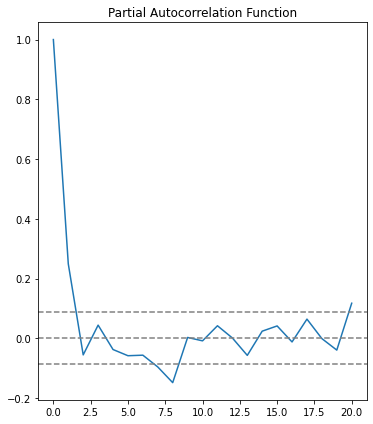

In [41]:
pacValues = pacf(differencedSeries, nlags=20, method='ols')
plt.subplot(122)
plt.plot(pacValues)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(differencedSeries)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(differencedSeries)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### Use of ACF and PACF

### A More rigourous way of selecting the best Models

In [42]:
# As mentioned earlier, an arima model is defined by p,d, and q; which constitue the order 
# of any given arima model. In order to avoid a tiresome trials and errors attempts, let us
# do a grid search work. This aims at giving a range of values to p, a range of values to d
# and a range of values to d. Once those values are defined, we can construct different (p,d,q)

In [43]:
# This function takes three lists and create a bigger list that will contain all the 
# possible three combinations we can create from those three lists.
def comb_p_d_q(pVals,dVals,qVals):
    return [(p,d,q) for p in pVals for d in dVals for q in qVals]
    

In [44]:
comb_p_d_q([0,1,2],[0,1,2],[0,1,2])

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [45]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
def aic_finder(ts, model_order):
    model = ARIMA(ts, order= model_order)
    model_fit = model.fit(disp=0)
    aicval = model_fit.aic
    if np.isfinite(aicval):
        return aicval
    else:
        return 9999

In [47]:
aic_finder(myPrice.values,(2,0,1))

1272.1555078946556

In [48]:
# Suppose that we have a given list of orders. Our task is to find the order that fit the 
# best our data. For each of the order in our list, we will fit the model, extract the aics.
# then, find the model that give us the smallest aic. The found model will be  considered 
# to be the best model.

In [49]:
def bestModel(timeseries,pVals,dVals,qVals):
    all_models = comb_p_d_q(pVals,dVals,qVals)
    
    # Let us work on  the partition of the series
    l = len(timeseries)
    trainSize = int(l*0.75)
    trainSet = timeseries[0:trainSize]
    testSet = timeseries[(trainSize+1):]
    aicVals = []
    
    for elem in all_models:
        mm = aic_finder(trainSet,elem)
        aicVals.append(mm)
    print('The list of aic is:', aicVals)
    print(' ')
    minVals = min(aicVals)
    print('The smallest aic value is ', minVals)
    locMin = aicVals.index(minVals)
    print('The location of the smallest value of aicVals is', locMin)
    print('The corresponding model is : ', all_models[locMin])

    

In [50]:
bestModel(myPrice.values,[1,2],[1,2],[1,2])

The list of aic is: [984.628776590349, 985.1931439071118, 990.6932644216781, 990.2308082864579, 986.2648882615197, 988.1317569111536, 991.3110670519028, 991.8240639224465]
 
The smallest aic value is  984.628776590349
The location of the smallest value of aicVals is 0
The corresponding model is :  (1, 1, 1)


In [51]:
# As mentioned earlier, forecasting is a key step of time series analysis. Thus, let us
# try to do some forecasting. This will be done by using the best model, we found.
from sklearn.metrics import mean_squared_error
def prediction(timeseries, order):
    from sklearn.metrics import mean_squared_error
    # Let us work on  the partition of the series
    l = len(timeseries)
    trainSize = int(l*0.75)
    trainSet = timeseries[0:trainSize]
    testSet = timeseries[(trainSize+1):]
    
    print('The length of the train set is',len(trainSet))
    print('The length of the test set is',len(testSet))
    
    trainSet = list(trainSet)
    predictedValues = list()
    g = lambda x: x[0]
    for i in range(len(testSet)):
        model = ARIMA(trainSet, order=order)
        model_fit = model.fit(disp=0)
        predictedVal = list(model_fit.forecast()[0])
        predictedVal = g(predictedVal)
        predictedValues.append(predictedVal)
        trainSet.append(predictedVal)

    print('The predicted values are:')
    print(' ')
    print(predictedValues)
    
    print('----------------------------------------------------------------------------')
    print('The length of the list that contains the predicted values is',len(predictedValues))
    print('----------------------------------------------------------------------------')
    
    print('How much error we have made')
    error = mean_squared_error(testSet, predictedValues)
    print('The  forecat erros is ', error)

    return(predictedValues)

In [52]:
testVal = prediction(myPrice.values,(1,1,1))

The length of the train set is 378
The length of the test set is 125
The predicted values are:
 
[62.45838027166299, 62.43817983768945, 62.42997147729242, 62.420686285062345, 62.41149785049074, 62.40230070449151, 62.3931043483793, 62.38390790179164, 62.37471145545299, 62.365515026726754, 62.3563185927179, 62.34712213940612, 62.337925709700045, 62.3287292731727, 62.31953282225341, 62.31033636456497, 62.30113988250135, 62.291943408891015, 62.28274693100161, 62.27355045076265, 62.26435396099874, 62.25515747422046, 62.24596100523259, 62.2367645295107, 62.22756804256345, 62.218371542652996, 62.20917504875097, 62.19997854607437, 62.190782063382585, 62.18158555896043, 62.17238903875642, 62.163192508975655, 62.15399599270825, 62.144799465495225, 62.13560294052587, 62.12640644378756, 62.11720993207465, 62.10801338788878, 62.09881686733221, 62.08962033988603, 62.08042381433846, 62.07122727660992, 62.06203073454543, 62.05283416533241, 62.0436376093156, 62.034441082712235, 62.02524454320936, 62.01